# Speech Emotion Recognition

In [ ]:
import pandas as pd
import numpy as np
import librosa
from IPython.display import Audio
import seaborn as sns
from keras.models import Model
from keras.layers import Dense, Dropout, Input,BatchNormalization, Add, LSTM
from keras.optimizers import SGD
from keras.utils import plot_model
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
%matplotlib inline

In [ ]:
# for access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import zipfile
# # unzip dataset file 
# local_zip = '/content/gdrive/MyDrive/Sound/train.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/gdrive/MyDrive/Proj4-2/train')
# zip_ref.close()

In [ ]:
# import zipfile
# # unzip dataset file 
# local_zip = '/content/gdrive/MyDrive/Sound/test.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/gdrive/MyDrive/Proj4-2/test')
# zip_ref.close()

In [ ]:
import os

file_name = os.listdir('/content/gdrive/MyDrive/Proj4-2/train/train')

In [ ]:
print(file_name[0])

1345FN.wav


In [ ]:
print(file_name)

['1345FN.wav', '1347MS.wav', '1348MN.wav', '1350MS.wav', '1351FS.wav', '1353FW.wav', '1354FN.wav', '1355MN.wav', '1356FH.wav', '1357MA.wav', '1358MA.wav', '1359MN.wav', '1362FA.wav', '1363FN.wav', '1364MN.wav', '1365MW.wav', '1366FW.wav', '1367MW.wav', '1368FA.wav', '1369MN.wav', '1371MN.wav', '1372MA.wav', '1376FA.wav', '1377MN.wav', '1378MA.wav', '1380FS.wav', '1384FS.wav', '1385MA.wav', '1386MN.wav', '1387MN.wav', '1388MS.wav', '1389FH.wav', '1390FN.wav', '1392FH.wav', '1393MA.wav', '1394MN.wav', '1395FS.wav', '1396MN.wav', '1397MA.wav', '1398FA.wav', '1402MA.wav', '1403MA.wav', '1405MA.wav', '1406MN.wav', '1407MN.wav', '1408MS.wav', '1409MS.wav', '1410MH.wav', '1411FA.wav', '1412MN.wav', '1413MA.wav', '1414FA.wav', '1415MA.wav', '1416MH.wav', '1417MA.wav', '1418MA.wav', '1420MN.wav', '1421MN.wav', '1422MN.wav', '1424MS.wav', '1425MN.wav', '1426MN.wav', '1428MN.wav', '1431MA.wav', '1432MA.wav', '1433FN.wav', '1434MN.wav', '1436FW.wav', '1438FA.wav', '1439FN.wav', '1440FN.wav', '1443

In [ ]:
len(file_name)

1994

##Display an audio from each feeling label for test and plotting the audio file's waveform and its spectrogram

صدای مربوط به کلاس  **خشمگین**

In [ ]:
import IPython

root = '/content/gdrive/MyDrive/Proj4-2/train/train/0003MA.wav'
IPython.display.Audio(root)

In [ ]:
data, sampling_rate = librosa.load(root)

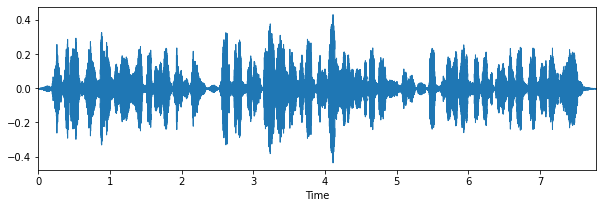

In [ ]:
import librosa.display
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

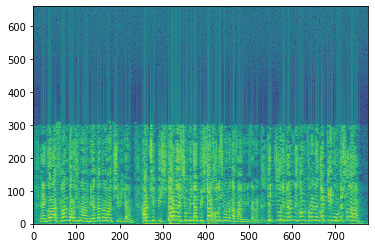

In [ ]:
from matplotlib.pyplot import specgram
import scipy.io.wavfile

sr,x = scipy.io.wavfile.read(root)

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

صدای مربوط به کلاس **بی تفاوت**

In [ ]:
path = '/content/gdrive/MyDrive/Proj4-2/train/train/0004MN.wav'
IPython.display.Audio(path)

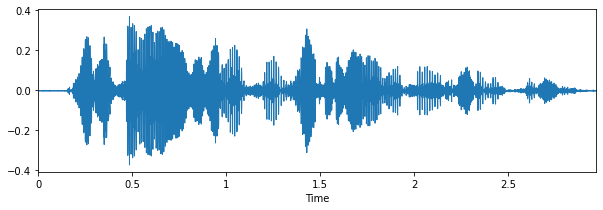

In [ ]:
import librosa.display
data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Proj4-2/train/train/0004MN.wav')

plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

صدای مربوط به کلاس **غمگین**

In [ ]:
path = '/content/gdrive/MyDrive/Proj4-2/train/train/0005FS.wav'
IPython.display.Audio(path)

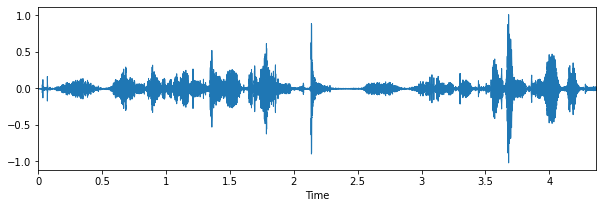

In [ ]:
import librosa.display
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

صدای مربوط به کلاس **خوشحال**

In [ ]:
path = '/content/gdrive/MyDrive/Proj4-2/train/train/0013FH.wav'
IPython.display.Audio(path)

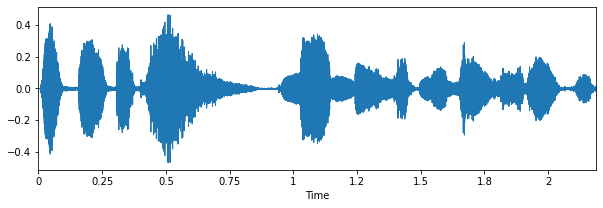

In [ ]:
import librosa.display
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

صدای مربوط به کلاس **شگفتی**

In [ ]:
path ='/content/gdrive/MyDrive/Proj4-2/train/train/0014FW.wav'
IPython.display.Audio(path)

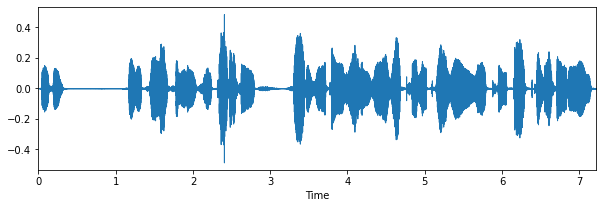

In [ ]:
import librosa.display
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

##creating feeling label from file names

In [ ]:
feeling_label = []
for i in range(len(file_name)):
  feeling_label.append(file_name[i][5])

In [ ]:
len(feeling_label)

1994

In [ ]:
print(feeling_label)

['N', 'S', 'N', 'S', 'S', 'W', 'N', 'N', 'H', 'A', 'A', 'N', 'A', 'N', 'N', 'W', 'W', 'W', 'A', 'N', 'N', 'A', 'A', 'N', 'A', 'S', 'S', 'A', 'N', 'N', 'S', 'H', 'N', 'H', 'A', 'N', 'S', 'N', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'S', 'S', 'H', 'A', 'N', 'A', 'A', 'A', 'H', 'A', 'A', 'N', 'N', 'N', 'S', 'N', 'N', 'N', 'A', 'A', 'N', 'N', 'W', 'A', 'N', 'N', 'N', 'N', 'S', 'S', 'H', 'A', 'A', 'A', 'N', 'H', 'H', 'H', 'A', 'A', 'N', 'H', 'S', 'A', 'N', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'N', 'A', 'A', 'H', 'A', 'A', 'A', 'S', 'H', 'W', 'A', 'W', 'N', 'A', 'N', 'N', 'N', 'A', 'S', 'A', 'N', 'S', 'A', 'A', 'N', 'S', 'S', 'S', 'N', 'A', 'W', 'N', 'N', 'W', 'N', 'N', 'A', 'W', 'A', 'N', 'N', 'W', 'A', 'S', 'A', 'S', 'N', 'A', 'A', 'S', 'N', 'S', 'A', 'S', 'A', 'N', 'H', 'W', 'A', 'N', 'N', 'S', 'A', 'N', 'N', 'A', 'W', 'A', 'N', 'N', 'A', 'A', 'S', 'A', 'H', 'H', 'A', 'S', 'A', 'S', 'N', 'A', 'N', 'N', 'N', 'S', 'N', 'A', 'A', 'A', 'N', 'S', 'A', 'A', 'A', 'S', 'A', 'A', 'A',

با استفاده از قطعه کد زیر لیبل ها را به شکل قابل فهم برای شبکه در میاوریم

In [ ]:
# encoding labels with label encoding
le = LabelEncoder()
le.fit(feeling_label)
feeling_label = le.transform(feeling_label)
feeling_label = to_categorical(feeling_label)

In [ ]:
# y_train
feeling_label.shape

(1994, 5)

##Getting the features of training audio files using librosa

یک فانکشن برای استخراج ویژگی ها با استفاده از روش ام اف سی سی مینویسی

In [ ]:
def extract_mfcc(file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path sound
    #Output: mfcc_features'''
    root = '/content/gdrive/MyDrive/Proj4-2/train/train/'
    path =  root + file_name 
    y, sample_rate = librosa.load(path)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sample_rate,n_mfcc=25).T,axis=0)
    
    return mfccs

ویژگی های مربوط به صداها را با استفاده از فانکشن بالا استخراح می کنیم

In [ ]:
features_mfcc = []

for filename in file_name:
    features_mfcc.append(extract_mfcc(filename))


قطعه کد زیر ویژکی استخراج شده برای صدای اول لیست را نشان می دهد و همانطور که مشاهده می کنیم این ویژکی 25 تایم استپ دارد

In [ ]:
features_mfcc[0]

array([-296.65759555,   79.7240972 ,  -24.3720298 ,    6.06310739,
        -14.48516738,    1.19440529,  -10.38078542,   -5.73889926,
        -10.94875644,   -8.6302081 ,  -12.45638335,    2.72565892,
        -15.44676255,   -5.4316073 ,   -3.38275548,   -1.81850995,
         -3.13234635,    0.58181949,   -0.55257926,    9.47400935,
          1.19290919,    7.78627365,    3.69457606,    9.07313516,
         -1.73712821])

In [ ]:
print(len(features_mfcc))
print(features_mfcc[0].shape)

1994
(25,)


با قطعه کد زیر لیست ویژگی ها را به صورت یک آرایه 25 بعدی در می آوریم

In [ ]:
# mfcc feature
sound_features = []

for i in range(len(file_name)):
    mfcc = features_mfcc[i]
    feature = np.array([mfcc]).reshape(25,1)
    sound_features.append(feature)
# x_train    
sound_features = np.asarray(sound_features)

In [ ]:
sound_features[0].shape

(25, 1)

##data normalization

In [ ]:
# Lets do data normalization 
mean = np.mean(sound_features, axis=0) # mean of data
std = np.std(sound_features, axis=0) # standard derivative of data

sound_features = (sound_features - mean)/std

In [ ]:
sound_features[0]

array([[-0.25710091],
       [-0.32215288],
       [-0.85436763],
       [-1.24432567],
       [-0.63347332],
       [-0.57844061],
       [-0.08501065],
       [-0.89294346],
       [ 0.72357449],
       [-1.31544989],
       [ 0.1088383 ],
       [ 0.79272221],
       [-0.84738265],
       [-0.30225293],
       [ 0.25801596],
       [-0.13495014],
       [ 0.32209988],
       [-0.16473379],
       [ 0.37620667],
       [ 1.26240038],
       [ 0.8843304 ],
       [ 0.87369867],
       [ 1.35985777],
       [ 1.15987838],
       [ 0.31838239]])

## divide training data inot training and validation data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(np.array(sound_features),feeling_label, test_size=0.20, random_state=42,shuffle=False)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))

1595
1595
399
399


In [ ]:
type(x_train)

numpy.ndarray

## test data preprocessing

همین کار نرمال سازی را باید برای داده های تست هم انجام دهیم 

In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/Sound/result.csv')

In [ ]:
test.head()

Id label
0  2705F     N
1  2707M     H
2  2708F     N
3  2710M     A
4  2711M     A

In [ ]:
filename_test = test['Id'].values.tolist()
y_actual_test = test['label'].values.tolist()

In [ ]:
print(filename_test)

['2705F', '2707M', '2708F', '2710M', '2711M', '2712M', '2713M', '2714M', '2715M', '2720F', '2721M', '2722F', '2724F', '2725M', '2726M', '2727F', '2728M', '2729F', '2733M', '2734F', '2735M', '2736M', '2737F', '2738M', '2740M', '2741M', '2743M', '2744F', '2745F', '2746F', '2747M', '2748M', '2749M', '2750M', '2752M', '2753M', '2754F', '2755M', '2756M', '2757M', '2761F', '2762M', '2764M', '2765M', '2766M', '2767F', '2768F', '2769M', '2770F', '2771M', '2772M', '2773M', '2774M', '2775M', '2776F', '2779M', '2780M', '2782F', '2783M', '2784F', '2785M', '2786M', '2787F', '2788F', '2790F', '2791F', '2792M', '2793M', '2794M', '2795M', '2797F', '2798M', '2800F', '2801F', '2802M', '2803F', '2804M', '2805F', '2806M', '2808M', '2810M', '2811M', '2812F', '2813M', '2814F', '2815M', '2816F', '2817M', '2818F', '2819M', '2820F', '2821M', '2822F', '2823M', '2825F', '2826F', '2827F', '2828F', '2830F', '2831M', '2834M', '2835M', '2836F', '2837M', '2838F', '2839F', '2841M', '2844F', '2845M', '2850M', '2851M', 

In [ ]:
for i in range(len(filename_test)):
  filename_test[i] = filename_test[i] + '.wav' 

In [ ]:
print(filename_test)
print(y_actual_test)

['2705F.wav', '2707M.wav', '2708F.wav', '2710M.wav', '2711M.wav', '2712M.wav', '2713M.wav', '2714M.wav', '2715M.wav', '2720F.wav', '2721M.wav', '2722F.wav', '2724F.wav', '2725M.wav', '2726M.wav', '2727F.wav', '2728M.wav', '2729F.wav', '2733M.wav', '2734F.wav', '2735M.wav', '2736M.wav', '2737F.wav', '2738M.wav', '2740M.wav', '2741M.wav', '2743M.wav', '2744F.wav', '2745F.wav', '2746F.wav', '2747M.wav', '2748M.wav', '2749M.wav', '2750M.wav', '2752M.wav', '2753M.wav', '2754F.wav', '2755M.wav', '2756M.wav', '2757M.wav', '2761F.wav', '2762M.wav', '2764M.wav', '2765M.wav', '2766M.wav', '2767F.wav', '2768F.wav', '2769M.wav', '2770F.wav', '2771M.wav', '2772M.wav', '2773M.wav', '2774M.wav', '2775M.wav', '2776F.wav', '2779M.wav', '2780M.wav', '2782F.wav', '2783M.wav', '2784F.wav', '2785M.wav', '2786M.wav', '2787F.wav', '2788F.wav', '2790F.wav', '2791F.wav', '2792M.wav', '2793M.wav', '2794M.wav', '2795M.wav', '2797F.wav', '2798M.wav', '2800F.wav', '2801F.wav', '2802M.wav', '2803F.wav', '2804M.wav'

In [ ]:
# encoding labels with label encoding
le.fit(y_actual_test)
y_actual_test = le.transform(y_actual_test)
y_actual_test = to_categorical(y_actual_test) # y_test

In [ ]:
y_actual_test.shape

(227, 5)

In [ ]:
def extract_mfcc_test(file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path sound
    #Output: mfcc_features'''
    root = '/content/gdrive/MyDrive/Proj4-2/test/test/'
    path =  root + file_name 
    y, sample_rate = librosa.load(path)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sample_rate,n_mfcc=25).T,axis=0)
    
    return mfccs

In [ ]:
test_features_mfcc = []

for filename in filename_test:
    test_features_mfcc.append(extract_mfcc_test(filename))

In [ ]:
print(len(test_features_mfcc))
print(test_features_mfcc[0].shape)

227
(25,)


In [ ]:
# mfcc feature
test_sound_features = []

for i in range(len(filename_test)):
    mfcc = test_features_mfcc[i]
    feature = np.array([mfcc]).reshape(25,1)
    test_sound_features.append(feature)
# x_test    
test_sound_features = np.asarray(test_sound_features)

In [ ]:
test_sound_features[0].shape

(25, 1)

In [ ]:
# normalize test dataset
test_sound_features = (test_sound_features - mean)/std

In [ ]:
test_sound_features[0]

array([[-1.68861023],
       [ 2.40120172],
       [ 0.64291141],
       [-0.59033753],
       [-0.01358465],
       [-1.20740146],
       [ 0.1242658 ],
       [-2.7973347 ],
       [ 0.34090274],
       [-0.91637226],
       [-0.42229765],
       [-0.13869124],
       [ 0.75107043],
       [-0.37243955],
       [ 0.15051492],
       [-0.61186478],
       [ 0.22146959],
       [-0.55268298],
       [-0.19905376],
       [-0.34848099],
       [ 0.83462624],
       [-0.64860949],
       [ 0.60562739],
       [-0.80546385],
       [ 0.04064664]])

In [ ]:
len(test_sound_features)

227

##Model1(LSTM)

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(128, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(hidden_layer3)

model1 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 5)                 85    

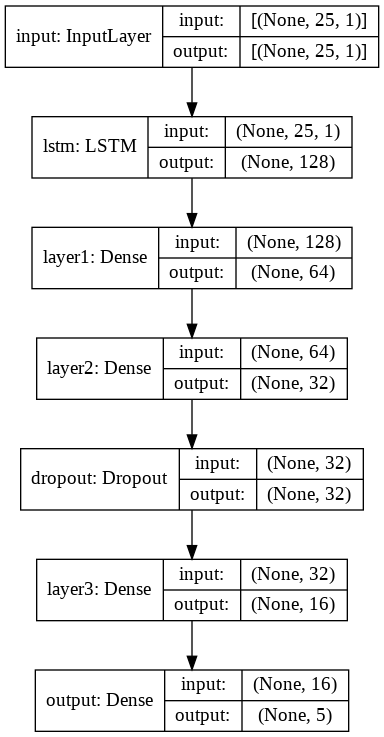

In [ ]:
plot_model(model1, show_shapes=True)

In [ ]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=50, batch_size = 64 ,verbose=1)

Epoch 1/50
25/25 [==============================] - 9s 26ms/step - loss: 1.5610 - accuracy: 0.2611 - val_loss: 1.2751 - val_accuracy: 0.5564
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 1.3023 - accuracy: 0.5310 - val_loss: 1.1261 - val_accuracy: 0.6291
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 1.2533 - accuracy: 0.5577 - val_loss: 1.1132 - val_accuracy: 0.6291
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 1.1871 - accuracy: 0.5887 - val_loss: 1.0966 - val_accuracy: 0.6516
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 1.1378 - accuracy: 0.6107 - val_loss: 1.0777 - val_accuracy: 0.6591
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 1.2131 - accuracy: 0.5730 - val_loss: 1.0707 - val_accuracy: 0.6516
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 1.1466 - accuracy: 0.6036 - val_loss: 1.1108 - val_accuracy: 0.6065
Epoch 8/50
25/25 [=

In [ ]:
model1.save_weights("lstm1_weights.h5")
model1.save("lstm1.h5")

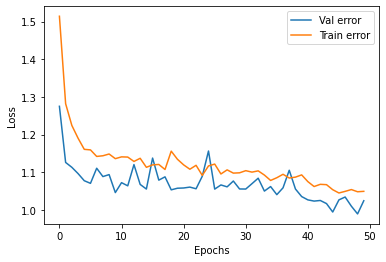

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

همانطور که در شکل بالا می بینیم خطا روی دادههای آموزشی و ولید در حال کاهش است. اما در این روند نوسان زیادی داریم که علت های مختلفی می تواند داشته باشد . یکی از حدس های ممکن این است که سایز بچ را کم گرفته ایم زیرا هرچه سایز بچ بیسشتر باشد مدل حساسیت کمتری به نویز دارد. در مدل بعد که با استفاده از همین معماری ساخته شده سایز بچ را افزایش می دهیم تا ببینیم تاثیر آن را ببینیم.

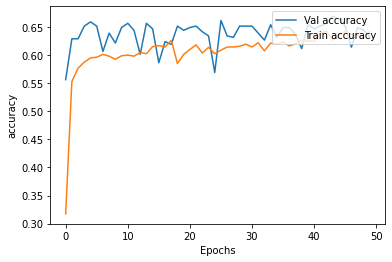

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

##Model2(LSTM)

این مدل معماری مشابع با معماری مدل قبل داردو تنها تفاوتی که دارد سایز دسته بندی ان است که در این مدل بیشتر گرفته ایم.

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(128, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(hidden_layer3)

model2 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 5)                 85    

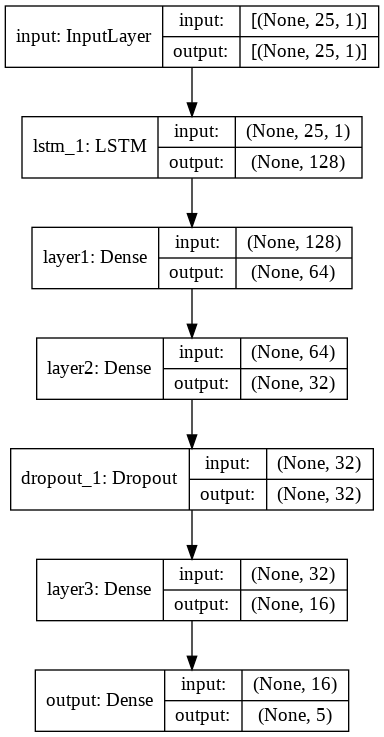

In [ ]:
plot_model(model2, show_shapes=True)

In [ ]:
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
13/13 [==============================] - 2s 44ms/step - loss: 1.5712 - accuracy: 0.3049 - val_loss: 1.4226 - val_accuracy: 0.4436
Epoch 2/60
13/13 [==============================] - 0s 9ms/step - loss: 1.3961 - accuracy: 0.4785 - val_loss: 1.1962 - val_accuracy: 0.5815
Epoch 3/60
13/13 [==============================] - 0s 10ms/step - loss: 1.2484 - accuracy: 0.5650 - val_loss: 1.1707 - val_accuracy: 0.5764
Epoch 4/60
13/13 [==============================] - 0s 9ms/step - loss: 1.2475 - accuracy: 0.5651 - val_loss: 1.1207 - val_accuracy: 0.6266
Epoch 5/60
13/13 [==============================] - 0s 9ms/step - loss: 1.2121 - accuracy: 0.5779 - val_loss: 1.1019 - val_accuracy: 0.6241
Epoch 6/60
13/13 [==============================] - 0s 9ms/step - loss: 1.1867 - accuracy: 0.5957 - val_loss: 1.0656 - val_accuracy: 0.6466
Epoch 7/60
13/13 [==============================] - 0s 9ms/step - loss: 1.2000 - accuracy: 0.5925 - val_loss: 1.0711 - val_accuracy: 0.6416
Epoch 8/60
13/13 [

In [ ]:
model2.save_weights("lstm2_weights.h5")
model2.save("lstm2.h5")

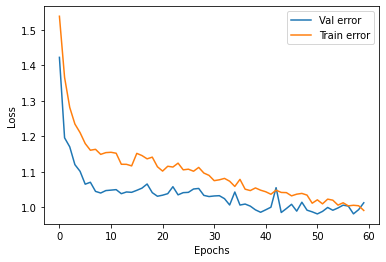

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

همانطور که می بینیم در این مدل خطا روی داده های آموزشی و ولید نسبت به مدل قبل کاهش یافته و دقت روی داده ها افزایش یافته است. همچنین خطا روی داده های ولید و اموزشی یا سرعت خوبی کم شده و در این روند نوسان کمتری نسبت به مدل قبل داشته ایم پس افازیش سایز بچ تاثیر گذار بوده است.

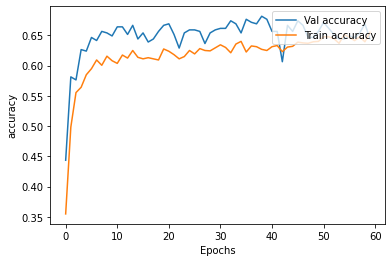

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

در بین این دو مدل مدل 2 بهترین مدل ما است حال می خواهیم مدل مان را روی داده های تست آزمایش کنیم تا ببینیم چه دقتی  دارند.
همانطور که می بینیم این مدل روی داده های تست دقت 64 درصد دارد و تابع هزینه آن برابر با یک است

In [ ]:
# preds = model2.predict(test_sound_features, batch_size=32, verbose=1)

In [ ]:
loss, acc = model2.evaluate(test_sound_features, y_actual_test,
                            batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', acc)

4/4 [==============================] - 0s 4ms/step - loss: 1.0451 - accuracy: 0.6476
Test loss: 1.0451319217681885
Test accuracy: 0.6475771069526672


کار آزمایش کردن را ادامه می دهیم تا در مقایسه بین مدل ها بهترین مدل را برای پیش بینی خروجی داده های تست انتخاب کنیم.

##Model3(LSTM)

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(256, return_sequences=False)(input_layer)
hidden_layer1 = Dense(128 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(64 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer1 = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(32 ,activation='tanh' , name="layer3")(droupout_layer1)
hidden_layer4 = Dense(16 ,activation='tanh' , name="layer4")(hidden_layer3)
droupout_layer2 = Dropout(0.4)(hidden_layer4)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer2)

model3 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               264192    
_________________________________________________________________
layer1 (Dense)               (None, 128)               32896     
_________________________________________________________________
layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
layer3 (Dense)               (None, 32)                2080      
_________________________________________________________________
layer4 (Dense)               (None, 16)                528   

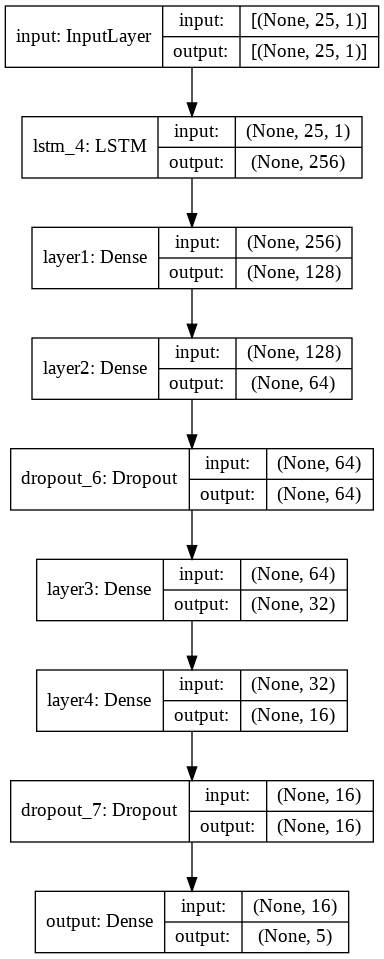

In [ ]:
plot_model(model3, show_shapes=True)

In [ ]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model3.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=70, batch_size = 256 ,verbose=1)

Epoch 1/70
7/7 [==============================] - 0s 25ms/step - loss: 0.9006 - accuracy: 0.6846 - val_loss: 1.0540 - val_accuracy: 0.6416
Epoch 2/70
7/7 [==============================] - 0s 18ms/step - loss: 0.9290 - accuracy: 0.6752 - val_loss: 1.0062 - val_accuracy: 0.6516
Epoch 3/70
7/7 [==============================] - 0s 18ms/step - loss: 0.9064 - accuracy: 0.6796 - val_loss: 1.0166 - val_accuracy: 0.6441
Epoch 4/70
7/7 [==============================] - 0s 16ms/step - loss: 0.9060 - accuracy: 0.6765 - val_loss: 1.0137 - val_accuracy: 0.6466
Epoch 5/70
7/7 [==============================] - 0s 16ms/step - loss: 0.9074 - accuracy: 0.6865 - val_loss: 1.0295 - val_accuracy: 0.6466
Epoch 6/70
7/7 [==============================] - 0s 16ms/step - loss: 0.9230 - accuracy: 0.6715 - val_loss: 1.0668 - val_accuracy: 0.6441
Epoch 7/70
7/7 [==============================] - 0s 15ms/step - loss: 0.9478 - accuracy: 0.6646 - val_loss: 0.9920 - val_accuracy: 0.6541
Epoch 8/70
7/7 [===========

In [ ]:
model3.save_weights("lstm3_weights.h5")
model3.save("lstm3.h5")

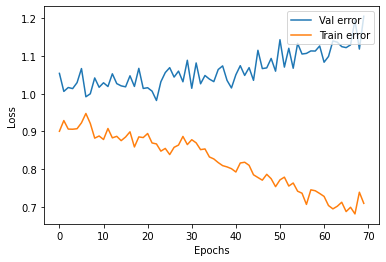

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

در شکل بالا مشاهده می شود که مدل اورفیت می شود زیرا خطا روی داده های آموزشی روند کاهشی دارد ولی خطا روی دادا های ولید روند افازیشی را دارد و این به آنمعنی است که مدل در حال حفظ داده های آموزشی است. این مدل خوب نیست و باید به دنبال مدل بهتری باشیم. تعداد پارامترهای زیادی که در این مدل داریم نیز یک یاز دلایل اورفیت شدن مدل ما است. در این مدل حدود 4 برابر مدل 2 پارامتر داریم که این ظرفیت مدل را برای اورفیت شدن بیشتر می کند..

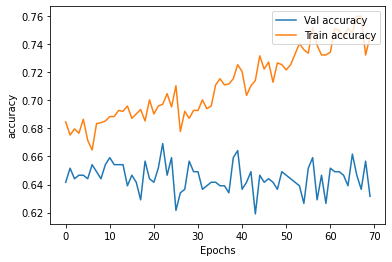

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

برای مثال از این مدل برای پیش بینی داده های اموزشی که در آموزش مدل هم استفاده شده و تا حدودی مدل آن را بخوبی یادگرفته، استفاده می شود تا ببینیم پیش بینی آن به چه صورت سات 

In [ ]:
pred = model3.predict(x_train, batch_size = 64)

In [ ]:
pred

array([[0.4890842 , 0.12346997, 0.04569574, 0.18261613, 0.15913397],
       [0.00172567, 0.0046073 , 0.02345925, 0.84015584, 0.13005196],
       [0.00606299, 0.00680256, 0.9720825 , 0.01260129, 0.00245061],
       ...,
       [0.00329241, 0.00670999, 0.0108978 , 0.7289029 , 0.25019693],
       [0.28433827, 0.18045533, 0.36799192, 0.09600832, 0.0712062 ],
       [0.02545479, 0.03757216, 0.74868387, 0.1427585 , 0.04553064]],
      dtype=float32)

In [ ]:
preds1=pred.argmax(axis=1)

In [ ]:
preds1

array([0, 3, 2, ..., 3, 2, 2])

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (le.inverse_transform((abc)))

In [ ]:
predictions

array(['A', 'S', 'N', ..., 'S', 'N', 'N'], dtype='<U1')

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

predictedvalues
0               A
1               S
2               N
3               S
4               S
5               S
6               N
7               N
8               N
9               A

In [ ]:
actual=y_train.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (le.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

actualvalues
0            N
1            S
2            N
3            S
4            S
5            W
6            N
7            N
8            H
9            A

In [ ]:
finaldf = actualdf.join(preddf)

In [ ]:
finaldf[170:180]

actualvalues predictedvalues
170            N               N
171            A               A
172            A               A
173            S               S
174            A               A
175            H               A
176            H               N
177            A               A
178            S               S
179            A               A

برای نمونه دو مورد از مواردی که اشتباه تشخیص داده را انتخاب می کنیم . که ما در اینجا نمونه 175 و 176 را انتخاب کرده ایم.

In [ ]:
print(file_name[175])

1595FH.wav


می بینیم که این صدا مربوط به حالت خوشحال است ولی مدل آن را به عوان خشمگین تشخیص دادع استبه نظر می رسد دلیل ان این است که تن صدای شخص خیلی بلند است و به اشتباه عنوان حالت خشمگین در نظر گرفته شده است. 

In [ ]:
path = '/content/gdrive/MyDrive/Proj4-2/train/train/'
path = path + file_name[175]
IPython.display.Audio(path)

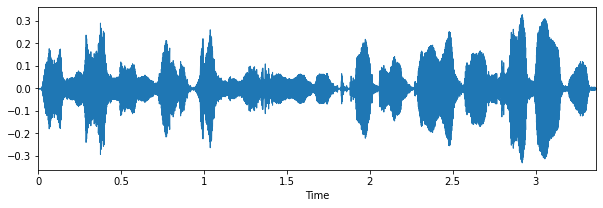

In [ ]:
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
print(file_name[176])

1597MH.wav


در این نمونه نیز تن صدای شخص خیلی معمولی است ولی در صحبت آن نوعی رضایت مندی به نظر می رسد و به خاظر تن صدای یکنواخت است که مدل /ان را به اشتباه به عنوان حالت بی تفاوت در نظر گرفته است.

In [ ]:
path = '/content/gdrive/MyDrive/Proj4-2/train/train/'
path = path + file_name[176]
IPython.display.Audio(path)

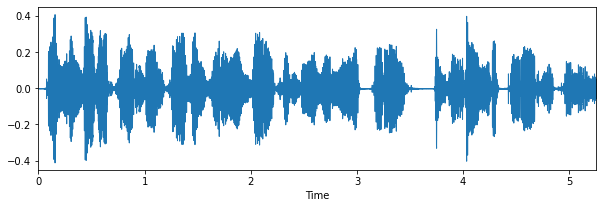

In [ ]:
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

همانطور که میبینم شکل بالا که مربوط به صدا در حالت خوشحال است بسیار مشابه شکل مربوط به کلاس بی تفاوت است که در ابتدای کد به عنوان نمونه چاپ کردیم  و این دلیل اشتباه مدل است.

##Model4(LSTM)

این مدل دقیقا مشابه مدل 2 است با این تفاوت که در اینجا تعداد یونیت های ال اس تی ام را در ددو لایه قرار دادیم. ینی تعداد یونتی برابری با مدل 2 دارد اما تعداد لایه ال اس تی ام دئ برابر شده است. 

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(64, return_sequences=True)(input_layer)
lstm_layer2 = LSTM(64, return_sequences=False)(lstm_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(lstm_layer2)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(hidden_layer3)

model4 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 25, 64)            16896     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                33024     
_________________________________________________________________
layer1 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528   

طبق این جدول مشاهده می شود که تعداد پارامترهای ما به دلیل اینکه یونتیت های ال اس تی ام را در دولایه قرار داده ایم نسبت به مدل 2 حدود 20000 تا کمتر شده است

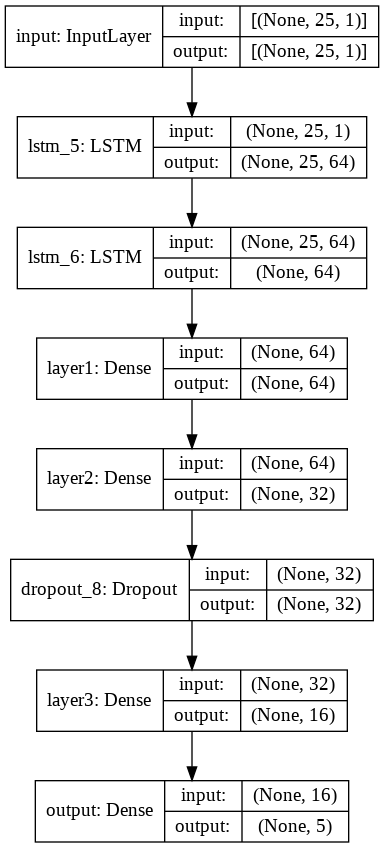

In [ ]:
plot_model(model4, show_shapes=True)

In [ ]:
model4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model4.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
13/13 [==============================] - 4s 89ms/step - loss: 1.5733 - accuracy: 0.3832 - val_loss: 1.3871 - val_accuracy: 0.5338
Epoch 2/60
13/13 [==============================] - 0s 11ms/step - loss: 1.3543 - accuracy: 0.5151 - val_loss: 1.1840 - val_accuracy: 0.5990
Epoch 3/60
13/13 [==============================] - 0s 11ms/step - loss: 1.2743 - accuracy: 0.5495 - val_loss: 1.1647 - val_accuracy: 0.6090
Epoch 4/60
13/13 [==============================] - 0s 11ms/step - loss: 1.2350 - accuracy: 0.5652 - val_loss: 1.1510 - val_accuracy: 0.6115
Epoch 5/60
13/13 [==============================] - 0s 11ms/step - loss: 1.2358 - accuracy: 0.5713 - val_loss: 1.1378 - val_accuracy: 0.6190
Epoch 6/60
13/13 [==============================] - 0s 10ms/step - loss: 1.2199 - accuracy: 0.5821 - val_loss: 1.1234 - val_accuracy: 0.6216
Epoch 7/60
13/13 [==============================] - 0s 10ms/step - loss: 1.1407 - accuracy: 0.6166 - val_loss: 1.1000 - val_accuracy: 0.6316
Epoch 8/60
13

همانطور ک میبینیم این مدل نسبت به مدل 2 خطای کمتری هم روی داده های آموزشی هم روی داد های ولید دارد. و دقت نیز روی این داده ها افزایش می یابد.

In [ ]:
model4.save_weights("lstm4_weights.h5")
model4.save("lstm4.h5")

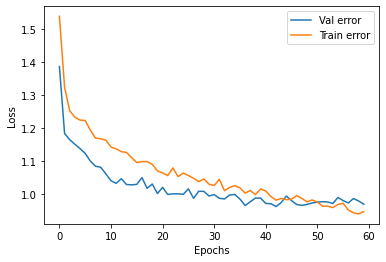

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

همانطور که مشاهده می شود خطا روی هر دو نمونه داده با سرعت مناسب و نوسان معقولی کم می شود. ولی در ایپاک 50 مدل در آستانه اورفیت شدن قرار می گیرد. با توجه به اینکه تعداد پارامترهای ای مدل نسبت به مدل 2 کمتر است انتظار می رود قدرت تعمیم آن بیشتر باشد، تنها دلیل می تواند این باشد که اضافه شدن لایه های ال اس تی ام احتمال بروز اورفیت را افازیش می دهند و ظرفیت یادگیری مدل زیاد می شود در نتیجه تمایل مدل به حفظ کردن داده ها نسبت به یادگیری بیشتر می شود. 

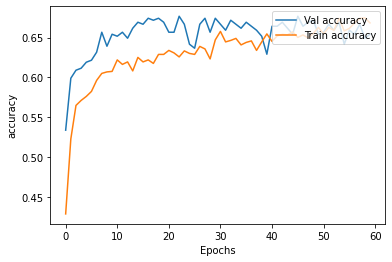

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

In [ ]:
from tensorflow import keras
model4 = keras.models.load_model('/content/gdrive/MyDrive/proj4-2-models/lstm4.h5')

دقت این مدل روی داده های تست کمتر از مدل 2 است و همچنین خطای آن روی داده های تست بیشتر است نسبت به آن  و نشان می دهد این مدل قدرت تعمیم کمتری نسبت به مدل 2 دارد.
بنابراین تا اینجا مدل 2 بهترین مدل ما است

In [ ]:
loss, acc = model4.evaluate(test_sound_features, y_actual_test,
                            batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', acc)

4/4 [==============================] - 0s 4ms/step - loss: 1.0537 - accuracy: 0.6388
Test loss: 1.0536582469940186
Test accuracy: 0.6387665271759033


##Model5(LSTM)

 در این قسمت معماری ما مشابه مدل دوم است ولی تعداد لایه ها و تعداد نورون ها را کم تر می کنیم همچنین تعداد یونتی های ال اسا تی ام را بین تعداد ویژکی های ورودی و تعداد خروجی میگیریم تا ببینیم عملکرد مدل چگونه است.

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(20, return_sequences=False)(input_layer)
hidden_layer1 = Dense(15 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(10 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.4)(hidden_layer2)
output_layer = Dense(5 ,activation='softmax' , name="output")(droupout_layer)

model5 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model5.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
layer1 (Dense)               (None, 15)                315       
_________________________________________________________________
layer2 (Dense)               (None, 10)                160       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
output (Dense)               (None, 5)                 55        
Total params: 2,290
Trainable params: 2,290
Non-trainable params: 0
___________________________________________________________

در این مدل تعداد پارامترها نسبت به بقیه مدل ها خیلی کمتر است

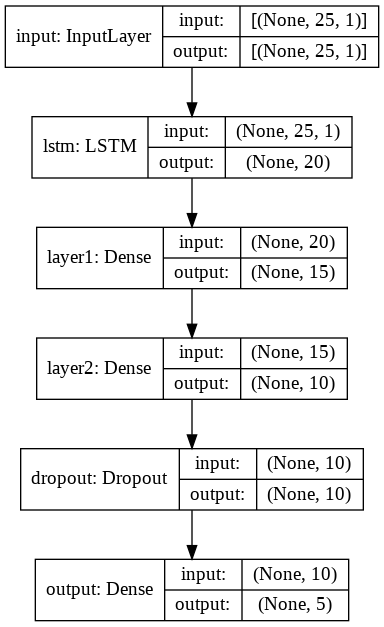

In [ ]:
plot_model(model5, show_shapes=True)

In [ ]:
model5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model5.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
13/13 [==============================] - 2s 40ms/step - loss: 1.6127 - accuracy: 0.2596 - val_loss: 1.5940 - val_accuracy: 0.3734
Epoch 2/60
13/13 [==============================] - 0s 6ms/step - loss: 1.5915 - accuracy: 0.3323 - val_loss: 1.5711 - val_accuracy: 0.3910
Epoch 3/60
13/13 [==============================] - 0s 6ms/step - loss: 1.5699 - accuracy: 0.3595 - val_loss: 1.5372 - val_accuracy: 0.3910
Epoch 4/60
13/13 [==============================] - 0s 6ms/step - loss: 1.5421 - accuracy: 0.3434 - val_loss: 1.4793 - val_accuracy: 0.3910
Epoch 5/60
13/13 [==============================] - 0s 7ms/step - loss: 1.4972 - accuracy: 0.3572 - val_loss: 1.4022 - val_accuracy: 0.3910
Epoch 6/60
13/13 [==============================] - 0s 7ms/step - loss: 1.4712 - accuracy: 0.3577 - val_loss: 1.3665 - val_accuracy: 0.3910
Epoch 7/60
13/13 [==============================] - 0s 6ms/step - loss: 1.4488 - accuracy: 0.3648 - val_loss: 1.3551 - val_accuracy: 0.4461
Epoch 8/60
13/13 [=

دقت این مدل نسبت به مدل 2 کمتر شده همچنین خطا روی داده های ولید و آموزشی نسبت به مدل دو افزایش داشته است و این بخاط این است که مدل ما نسبت به مدل 2 خیلی ساده تر استت و پیچیدگی آن کمتر است و این دلیل بر این هم هست که مدل ما اوروفیت نمی شود و ظرفیت بالایی برای حفظ کردن ندارد.

In [ ]:
model5.save_weights("lstm5_weights.h5")
model5.save("lstm5.h5")

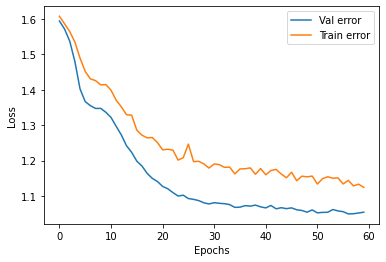

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

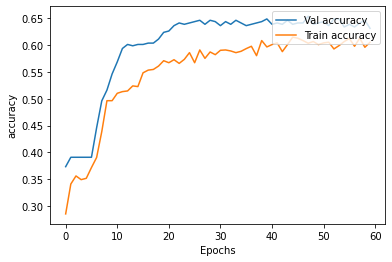

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

نسبت به دقت مدل و خطای مدل روی داده های اعتبارسنجی و آموزشی این مدل تعمیم خوبی روی داده های تست دارد.ولی همچنان مدل 2 بهترین مدل ما است

In [ ]:
loss, acc = model5.evaluate(test_sound_features, y_actual_test,
                            batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', acc)

4/4 [==============================] - 0s 3ms/step - loss: 1.1446 - accuracy: 0.5859
Test loss: 1.1445835828781128
Test accuracy: 0.5859031081199646


##Model6(GRU)

حال چون مدل 2 بهترین مدل ما بوده میخواهیم روی ان تغییراتی انجام دهیم تا اگر امکان دارد بهتر شود. جی ار یو معمولا عملکرد بهتری نسبت به ال اس تی ام دارند برای همین در این مدل که دقیقا مشابه مدل 2 است بجای لایه ال اس تی ام لایه جی ار یو قرار می دهیم

In [ ]:
# GRU input -> (timesteps,Features)
# each timestep represent with 1 features
from keras.layers import GRU

input_layer = Input(shape=(25,1), name ="input")
gru_layer = GRU(128, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(gru_layer)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(5 ,activation='softmax' , name="output")(hidden_layer3)

model6 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model6.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
layer1 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 5)                 85    

همانطور که می بینیم در این مدل نسبت به مدل 2 تعداد پارامترهای کمتری داریم و این به دلیل استفاده از لایه جی آ یو است زیرا در جی آ یو که مشابه ال اس تی ام است محاسبات و پارامترهای کمتری نسبت به ال اس تی ام داریم و این به دلیل آن است که در جی آر یو یکسری از گیت ها با هم ادغام شده اند..

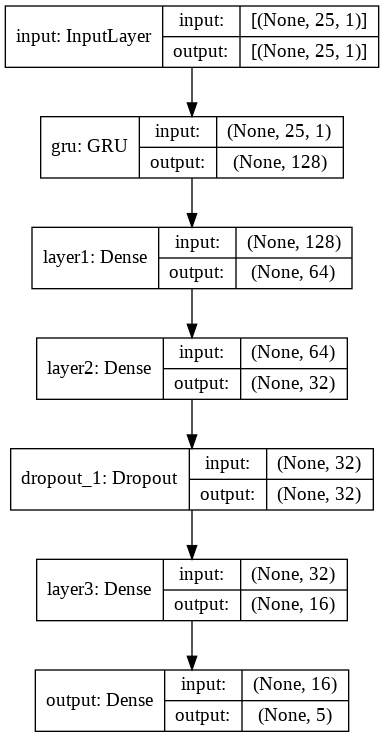

In [ ]:
plot_model(model6, show_shapes=True)

In [ ]:
model6.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model6.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
13/13 [==============================] - 2s 39ms/step - loss: 1.5578 - accuracy: 0.2710 - val_loss: 1.4064 - val_accuracy: 0.3910
Epoch 2/60
13/13 [==============================] - 0s 7ms/step - loss: 1.4220 - accuracy: 0.4006 - val_loss: 1.3246 - val_accuracy: 0.4662
Epoch 3/60
13/13 [==============================] - 0s 7ms/step - loss: 1.3835 - accuracy: 0.4631 - val_loss: 1.3114 - val_accuracy: 0.4737
Epoch 4/60
13/13 [==============================] - 0s 7ms/step - loss: 1.3634 - accuracy: 0.4468 - val_loss: 1.3002 - val_accuracy: 0.4787
Epoch 5/60
13/13 [==============================] - 0s 7ms/step - loss: 1.3414 - accuracy: 0.4589 - val_loss: 1.2864 - val_accuracy: 0.4837
Epoch 6/60
13/13 [==============================] - 0s 7ms/step - loss: 1.3533 - accuracy: 0.4549 - val_loss: 1.2732 - val_accuracy: 0.4837
Epoch 7/60
13/13 [==============================] - 0s 6ms/step - loss: 1.3021 - accuracy: 0.4807 - val_loss: 1.2509 - val_accuracy: 0.5213
Epoch 8/60
13/13 [=

In [ ]:
model6.save_weights("gru6_weights.h5")
model6.save("gru6.h5")

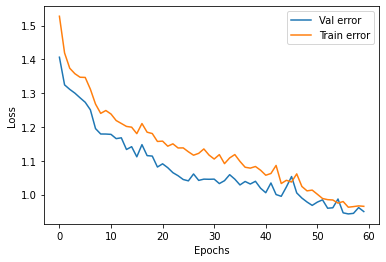

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

در شکل بالا می بینیم که خطا روند کاهشی را روی داده های ولید و آموزشی دارد. این مدل نسبت به مدل 2 خطا روی داده های آموزشی بیشتر شده و دقت نیز روی داده های آموزشی کمی کممتر شده اما خطا روی داده های ولید کم تر شده و دقت برای ن افزایش پیدا کرده است. و همچنین طبق قطعه کد بعدی پیش بینی آن برای داده های تست، خطا روی داده های تست نسبت به مدل 2 کمتر شده است و دقت نیز کمی کمتر شده. بنظر می رسد این مدل قدرت تعمیم بیشتری نسبت به مدل 2 دارد زیرا دقت ان روی داده های ولید که در آموزش استفاده نشد اند افزایش یافته همچنین خطا روی داده های تست و ولید نسب به مدل 2 کمتر شده است . پس از همین مدل برای پیش بینین استفاده می شود. 

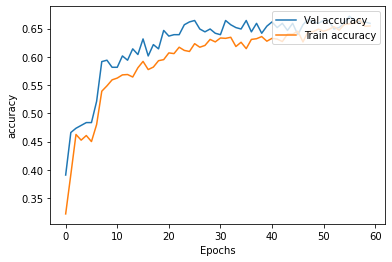

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

In [ ]:
loss, acc = model6.evaluate(test_sound_features, y_actual_test,
                            batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', acc)

4/4 [==============================] - 0s 3ms/step - loss: 1.0255 - accuracy: 0.6432
Test loss: 1.025498390197754
Test accuracy: 0.6431717872619629


##load model6(gru) and use it for predicting test results

In [ ]:
from tensorflow import keras
model6_gru = keras.models.load_model('/content/gdrive/MyDrive/proj4-2-models/gru6.h5')

In [ ]:
prediction = model6_gru.predict(test_sound_features, batch_size = 64)

In [ ]:
prediction

array([[0.1907925 , 0.11348098, 0.49460718, 0.12209534, 0.07902396],
       [0.02981944, 0.02288242, 0.88243127, 0.05128894, 0.01357787],
       [0.11162101, 0.08536701, 0.26614565, 0.35860562, 0.1782607 ],
       ...,
       [0.02398052, 0.02081608, 0.8597308 , 0.07923988, 0.01623271],
       [0.15606152, 0.11902711, 0.2746581 , 0.26752642, 0.18272687],
       [0.02774667, 0.02604732, 0.84002197, 0.08591495, 0.02026909]],
      dtype=float32)

In [ ]:
preds = prediction.argmax(axis=1)

In [ ]:
preds

array([2, 2, 3, 0, 0, 0, 2, 2, 0, 0, 2, 3, 0, 3, 0, 2, 3, 3, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 3, 0, 0, 2, 3,
       2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3,
       0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 3, 2, 0, 2, 4, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 0, 3, 2, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2, 0, 3, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 3, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 3, 3, 2, 2, 2, 2])

In [ ]:
abc = preds.astype(int).flatten()
# predict on test dataset
predictions_emotion = (le.inverse_transform((abc)))

In [ ]:
actual=y_actual_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (le.inverse_transform((abc123)))

In [ ]:
result_emotion = pd.DataFrame({'Id':filename_test ,'actualvalues': actualvalues, 'predictedvalues': predictions_emotion})
result_emotion.to_csv('result_emotion.csv', index=False)

In [ ]:
result_emotion.head()

Id actualvalues predictedvalues
0  2705F.wav            N               N
1  2707M.wav            H               N
2  2708F.wav            N               S
3  2710M.wav            A               A
4  2711M.wav            A               A

طبق قطعه کد زیر می بینیم که مدل  ما هیچ صدایی را به عنوان خوشحال تشخسص نداده است و بیشتر صداها را به عنوان کلاس بی تفوت تشخیص داده، یکی از علت ها که قطعا مدل ماست که انقدر دقیق نیست و دلیل دیکر این است که جنسیت ها جدا نشده اند. زیرا صداهای زن و مرد در هر احساسات فرق دارد.

In [ ]:
result_emotion.groupby('predictedvalues').count()

Id  actualvalues
predictedvalues                   
A                 87            87
N                117           117
S                 22            22
W                  1             1

در کد زیر نیز مشاهده می شود 22 صدا مربوط به صدای خوشحال است که مدل ما نونسته آن ها را تشخیص دهد.

In [ ]:
result_emotion.groupby('actualvalues').count()

Id  predictedvalues
actualvalues                     
A             72               72
H             22               22
N             92               92
S             27               27
W             14               14

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/proj4-2-models/result_emotion.csv')

In [ ]:
df.head()

Id actualvalues predictedvalues
0  2705F.wav            N               N
1  2707M.wav            H               N
2  2708F.wav            N               S
3  2710M.wav            A               A
4  2711M.wav            A               A

In [ ]:
df.shape

(227, 3)

برای مثال دو نمونه از خطاهایی که مدل را داشته که در پنج سطر اول این فایل می بینم را چاپ می کنیم تا علت خطا را دریابیم.

In [ ]:
IPython.display.Audio('/content/gdrive/MyDrive/Proj4-2/test/test/2707M.wav')

این صدا مربوط به کلاس خوشحال است ولی به  عنوان بی تفاوت شناسایی شده

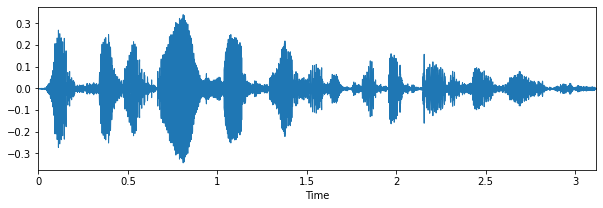

In [ ]:
data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Proj4-2/test/test/2707M.wav')
import librosa.display
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
IPython.display.Audio('/content/gdrive/MyDrive/Proj4-2/test/test/2708F.wav')

این صدا مربوط به کلاس بی تفاوت است ولی به عنوان غمگین تشخیص داده شده.

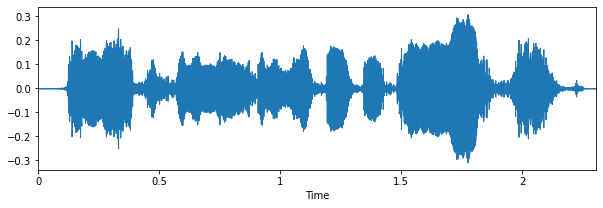

In [ ]:
data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Proj4-2/test/test/2708F.wav')

plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

###confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


0.6431718061674009


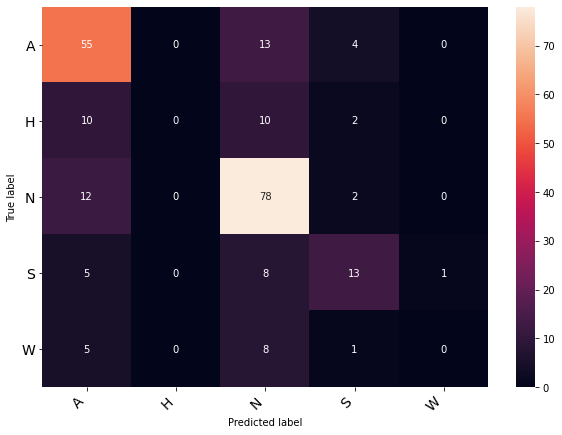

In [ ]:
# Get the predictions file 
classes = df.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(df.actualvalues, df.predictedvalues)
print(accuracy_score(df.actualvalues, df.predictedvalues))
print_confusion_matrix(c, class_names = classes)

در ماتریس بالا می بینیم که اکثر داده های مربوط به کلاس بی تفاوت درست تشخسص داده شده اند که طبق قطعه کدهای زیر دلیل آن این است که تعداد داده های مربوط به کلاس بی تفاوت در داده های آموزشی ما زیاد است و حدود یک سوم داده ها از این نوع کلاس اند پس مدل بیشتر آن ها را یاد می کیرد و بایاس بیشتری به سمت این کلاس دارد پس طبیعی است که بعضی از داده ها را به اشتباه به عنوان کلاس بی تفاوت تشخیص دهد..
طبق این ماتریس هیچ داده ای به عنوان داده ی خوشحال تشخیص دادن نشده در صورتی که در داده های تستمان ما 22 نمونه مربوط به این کلاس داریم.. 10 تا از داده هاس کلاس خوشحال به عنوان خشمگین تشخیص داده شده اند که یکی از دلایل آن می تواند این باشد که الگوی صدایی این دو کلاس تقریبا مشابه یکدیگر است.. و 10 تای دیگر را به عنوان کلاس بی تفات شناسایی کرده سات.
داده های مربوط به کلاس خشمگین نیز تا حد زیادی درست تشخیص داده شده اند که دلیل آن این سات که در داده های آموزشی تعداد 720 تا داده مربوط به این کلاس داشتیم و این کلاس نیز به خوبی یاد گرفته شده و بایاس به سمت این کلاس نیز هست.

پس این مدل روی داده های مربوط به کلاس بی تفاوت و خشمگین ، مخصوصا بی تفاوت خیلی خوب عمل می کند و دلیل آن این سات که تعداد خوبی از این داده ها را در داده های آموزشی دیده ایم و یادگرفته ایم.

In [ ]:
train_label = []
for i in range(len(file_name)):
  train_label.append(file_name[i][5])

In [ ]:
print(train_label)
print(len(train_label))

['N', 'S', 'N', 'S', 'S', 'W', 'N', 'N', 'H', 'A', 'A', 'N', 'A', 'N', 'N', 'W', 'W', 'W', 'A', 'N', 'N', 'A', 'A', 'N', 'A', 'S', 'S', 'A', 'N', 'N', 'S', 'H', 'N', 'H', 'A', 'N', 'S', 'N', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'S', 'S', 'H', 'A', 'N', 'A', 'A', 'A', 'H', 'A', 'A', 'N', 'N', 'N', 'S', 'N', 'N', 'N', 'A', 'A', 'N', 'N', 'W', 'A', 'N', 'N', 'N', 'N', 'S', 'S', 'H', 'A', 'A', 'A', 'N', 'H', 'H', 'H', 'A', 'A', 'N', 'H', 'S', 'A', 'N', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'N', 'A', 'A', 'H', 'A', 'A', 'A', 'S', 'H', 'W', 'A', 'W', 'N', 'A', 'N', 'N', 'N', 'A', 'S', 'A', 'N', 'S', 'A', 'A', 'N', 'S', 'S', 'S', 'N', 'A', 'W', 'N', 'N', 'W', 'N', 'N', 'A', 'W', 'A', 'N', 'N', 'W', 'A', 'S', 'A', 'S', 'N', 'A', 'A', 'S', 'N', 'S', 'A', 'S', 'A', 'N', 'H', 'W', 'A', 'N', 'N', 'S', 'A', 'N', 'N', 'A', 'W', 'A', 'N', 'N', 'A', 'A', 'S', 'A', 'H', 'H', 'A', 'S', 'A', 'S', 'N', 'A', 'N', 'N', 'N', 'S', 'N', 'A', 'A', 'A', 'N', 'S', 'A', 'A', 'A', 'S', 'A', 'A', 'A',

In [ ]:
print('number of N: ',train_label.count('N'))
print('number of W: ',train_label.count('W'))
print('number of S: ',train_label.count('S'))
print('number of A: ',train_label.count('A'))
print('number of H: ',train_label.count('H'))


number of N:  690
number of W:  149
number of S:  302
number of A:  723
number of H:  130


تا اینجای کار ما مرد و زن بودن را در نظر نگرفتیم یعنی فرقی بین صدای مرد خوشحال و زن خوشحال نگذاشته ایم و این می تواند یکی از دلایل خطای ما باشد زیرا تن صداها برای مرد و زن فرق دارد و این ممکن است مدل را به شاتباه بیاندازد